In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [3]:
# import data
data = pd.read_csv('hcp_drug_prediction_data_cleaned.csv')
print(data)

      Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
0      100004           8         112.44            88.64          111.01   
1      100206           6         118.78           104.94          116.55   
2      100307           4         103.45           109.92          101.90   
3      100408           4         125.19           100.77          113.51   
4      100610           4         101.69           115.18          114.18   
5      101006           2          70.00            94.30           92.33   
6      101107           9          97.37           105.69           96.19   
7      101208           6          95.64            82.44           84.46   
8      101309           5          93.36            86.03          103.37   
9      101410           8         111.31           106.84          100.58   
10     101612           4         101.54            96.84          108.32   
11     101915           6          84.96            90.94           89.10   

In [4]:
data["Age_recoded"] = data["Age_recoded"].astype('category')
data["Gender_recoded"] = data["Gender_recoded"].astype('category')
data["sub_use"] = data["sub_use"].astype('category')

In [5]:
print(data.shape)

(1169, 75)


In [17]:
X


,PSQI_Score,PicSeq_AgeAdj,CardSort_AgeAdj,Flanker_AgeAdj,PMAT24_A_CR,PMAT24_A_SI,PMAT24_A_RTCR,ReadEng_AgeAdj,PicVocab_AgeAdj,ProcSpeed_AgeAdj,...,InstruSupp_Unadj,PercStress_Unadj,SelfEff_Unadj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,Age_recoded,Gender_recoded
0,1.119884,0.457481,-1.313371,0.952953,0.474977,-0.803643,-0.002853,-0.619622,-0.221383,-1.685268,...,-1.457660,0.754864,-1.339909,-1.091558,-2.108668,-1.086724,0.982099,25.0,1,0
1,0.408586,0.834918,0.303455,1.501609,0.679038,-0.803643,0.318623,-0.189898,0.561291,1.449353,...,-0.222762,1.016909,-0.813653,-0.746311,-0.831532,-1.426489,0.574402,32.0,2,0
3,-0.302713,1.216521,-0.110175,1.200542,-1.973748,2.175613,-1.354464,1.270752,1.570079,-0.364896,...,0.339557,-0.184130,0.669433,-0.055818,0.126321,-0.067430,-0.240991,33.0,3,0
4,-0.302713,-0.182493,1.319178,1.266895,1.291219,-0.803643,-0.359390,1.716424,2.473628,-0.358829,...,0.041859,-1.166799,0.286701,-0.401065,0.764889,0.272335,-1.328182,15.0,2,0
6,1.475534,-0.439674,0.377848,-0.514751,-0.545325,0.437714,-0.941053,0.437350,0.557008,-0.270367,...,-1.700229,0.372715,2.104677,-0.918935,1.084173,0.442218,-0.648688,28.0,1,0
8,0.052937,-0.678399,-1.572261,0.196323,-0.341264,0.189442,-0.329446,-0.897833,0.841520,-0.803166,...,1.640610,-0.609953,1.387055,0.462052,-0.991174,0.272335,-2.007677,26.0,2,0
9,1.119884,0.390210,0.491919,-0.079986,0.474977,-0.803643,0.648824,-0.331647,-0.542703,-0.575690,...,1.640610,-0.271478,-0.155833,-0.228442,-0.352605,0.102453,-0.648688,29.0,2,0
12,-0.658362,0.155056,0.353050,0.406278,0.679038,-0.803643,0.859515,1.157978,0.998293,1.386671,...,1.640610,-0.326071,0.155137,-1.436805,-0.192963,-1.256607,-1.328182,36.0,1,0
14,-1.369660,0.508084,-1.019763,-2.830198,0.270917,-0.555372,1.224024,0.805969,0.270187,-2.888870,...,-0.487383,1.453651,0.083375,-1.264181,1.722741,-1.256607,-0.648688,27.0,2,0
15,0.052937,1.517160,0.829171,1.120323,0.270917,-0.555372,-0.272787,-0.913263,-0.080951,2.039275,...,1.640610,-0.970265,2.104677,0.116805,0.285963,1.291630,-1.599980,35.0,1,0


In [6]:
print(data.dtypes)

Subject                 int64
PSQI_Score              int64
PicSeq_AgeAdj         float64
CardSort_AgeAdj       float64
Flanker_AgeAdj        float64
PMAT24_A_CR           float64
PMAT24_A_SI           float64
PMAT24_A_RTCR         float64
ReadEng_AgeAdj        float64
PicVocab_AgeAdj       float64
ProcSpeed_AgeAdj      float64
DDisc_SV_1mo_200      float64
DDisc_SV_6mo_200      float64
DDisc_SV_1yr_200      float64
DDisc_SV_3yr_200      float64
DDisc_SV_5yr_200      float64
DDisc_SV_10yr_200     float64
DDisc_SV_1mo_40K      float64
DDisc_SV_6mo_40K      float64
DDisc_SV_1yr_40K      float64
DDisc_SV_3yr_40K      float64
DDisc_SV_5yr_40K      float64
DDisc_SV_10yr_40K     float64
DDisc_AUC_200         float64
DDisc_AUC_40K         float64
VSPLOT_TC             float64
VSPLOT_CRTE           float64
VSPLOT_OFF            float64
SCPT_TP               float64
SCPT_TN               float64
                       ...   
ER40ANG               float64
ER40FEAR              float64
ER40HAP   

In [9]:
#array = dataframe.values


X = data.drop(['Subject','sub_use'], axis = 1)
y = data.loc[:,'sub_use']

In [10]:
print(X.shape)
print(X.iloc[:,0:71])

(1169, 73)
      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
0              8         112.44            88.64          111.01         19.0   
1              6         118.78           104.94          116.55         20.0   
2              4         103.45           109.92          101.90         17.0   
3              4         125.19           100.77          113.51          7.0   
4              4         101.69           115.18          114.18         23.0   
5              2          70.00            94.30           92.33         11.0   
6              9          97.37           105.69           96.19         14.0   
7              6          95.64            82.44           84.46          8.0   
8              5          93.36            86.03          103.37         15.0   
9              8         111.31           106.84          100.58         19.0   
10             4         101.54            96.84          108.32         19.0   
11             6 

In [11]:
# pull out continuous vars

# Change the code to split 
data_con = data.iloc[:,0:71]

# standardize continuous vars
scaler = StandardScaler()
data.iloc[:,0:71] = scaler.fit_transform(data_con)

In [12]:
male_data = data[data['Gender_recoded'] == 0]

In [21]:
X = male_data.drop(['Subject', 'sub_use'], axis = 1)
y = male_data.loc[:,'sub_use']

In [14]:
print(X)

      PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  PMAT24_A_CR  \
0       1.119884       0.457481        -1.313371        0.952953     0.474977   
1       0.408586       0.834918         0.303455        1.501609     0.679038   
3      -0.302713       1.216521        -0.110175        1.200542    -1.973748   
4      -0.302713      -0.182493         1.319178        1.266895     1.291219   
6       1.475534      -0.439674         0.377848       -0.514751    -0.545325   
8       0.052937      -0.678399        -1.572261        0.196323    -0.341264   
9       1.119884       0.390210         0.491919       -0.079986     0.474977   
12     -0.658362       0.155056         0.353050        0.406278     0.679038   
14     -1.369660       0.508084        -1.019763       -2.830198     0.270917   
15      0.052937       1.517160         0.829171        1.120323     0.270917   
16     -1.725310      -0.438483        -0.019910       -0.800963     1.087159   
18      1.831183      -0.296

In [20]:
print(y)

       Subject  PSQI_Score  PicSeq_AgeAdj  CardSort_AgeAdj  Flanker_AgeAdj  \
0    -1.006199    1.119884       0.457481        -1.313371        0.952953   
1    -1.005462    0.408586       0.834918         0.303455        1.501609   
3    -1.004725   -0.302713       1.216521        -0.110175        1.200542   
4    -1.003988   -0.302713      -0.182493         1.319178        1.266895   
6    -1.002174    1.475534      -0.439674         0.377848       -0.514751   
8    -1.001437    0.052937      -0.678399        -1.572261        0.196323   
9    -1.001069    1.119884       0.390210         0.491919       -0.079986   
12   -0.998887   -0.658362       0.155056         0.353050        0.406278   
14   -0.997044   -1.369660       0.508084        -1.019763       -2.830198   
15   -0.996675    0.052937       1.517160         0.829171        1.120323   
16   -0.996307   -1.725310      -0.438483        -0.019910       -0.800963   
18   -0.995230    1.831183      -0.296201        -0.827331      

C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gerso\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

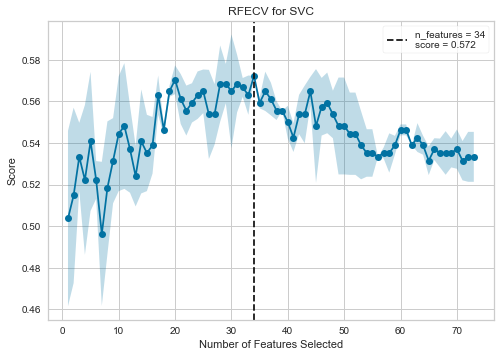

In [22]:
#from yellowbrick.features import RFECV
# feature extraction
'''model = LogisticRegression()

# The "accuracy" scoring is proportional to the number of correct classifications
# cv default is 3-fold
rfecv = RFECV(estimator=model,step=1,scoring='accuracy') 
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()'''
#conda install -c districtdatalabs yellowbrick


from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV



# Create RFECV visualizer with linear SVM classifier
viz = RFECV(SVC(kernel='linear', C=1, class_weight='balanced'))
viz.fit(X, y)
viz.poof()



In [30]:
from sklearn.feature_selection import RFE

est=RFE(SVC(kernel='linear', C=1, class_weight='balanced'), 11)
est.fit(X,y)
 
#est2 = RFE(SVC(kernel='linear', C=1, class_weight='balanced'), 10)
#est2.fit(X,y)  



RFE(estimator=SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
                  decision_function_shape='ovr', degree=3,
                  gamma='auto_deprecated', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=11, step=1, verbose=0)

In [31]:
inds = est.get_support()
print(X.columns[inds])
'''inds2 = est2.get_support()
AAA = X.columns[inds]
BBB = X.columns[inds2]
print(AAA)
print(BBB)'''

Index(['PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj',
       'ProcSpeed_AgeAdj', 'DDisc_SV_1yr_40K', 'DDisc_SV_3yr_40K',
       'ListSort_AgeAdj', 'CogFluidComp_AgeAdj', 'CogEarlyComp_AgeAdj',
       'AngAggr_Unadj', 'NEOFAC_O'],
      dtype='object')


'inds2 = est2.get_support()\nAAA = X.columns[inds]\nBBB = X.columns[inds2]\nprint(AAA)\nprint(BBB)'